Classification

Decision Tree

Bemorga dori tavsiya qilish tizimi

Tasavvur qiling, siz tadqiqot uchun ma'lumot to'playotgan tibbiy tadqiqotchisiz. Siz bir xil kasallikdan aziyat chekkan bemorlar haqida ma'lumot to'pladingiz. Davolash kursi davomida bemorlarga 5 xil doridan biri ijobiy ta'sir qildi.

Sizning vazifangiz, xuddi shu kasallik bilan kasallangan kelajakdagi bemorga qaysi dori mos kelishi mumkinligini aniqlaydigan model yaratish. 

Ushbu muammo ko'p toifali klassifikator (multiclass classification) yordamida xal qilinadi.

Model yaratish uchun Decision Tree algoritmidan foydalanamiz.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

Ustunlar:
- `Age` - yosh
- `Sex` - jins
- `BP` - qon bosimi
- `Cholesterol` - qondagi xolesterol
- `Na_to_K` - organizmdagi natriy miqdorining kaliyga nisbati

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
178,39,M,NORMAL,HIGH,15.969,drugY
92,29,F,HIGH,HIGH,29.450,drugY
97,56,F,HIGH,HIGH,25.395,drugY
24,33,F,LOW,HIGH,33.486,drugY
55,26,F,LOW,HIGH,14.160,drugC
39,15,M,NORMAL,HIGH,9.084,drugX
121,15,M,HIGH,NORMAL,17.206,drugY
7,41,M,LOW,HIGH,11.037,drugC
15,16,F,HIGH,NORMAL,15.516,drugY
56,65,M,HIGH,NORMAL,11.340,drugB


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Matnli ustunlarga ishlov beramiz

In [5]:
encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
198,23,1,2,1,14.020,drugX
85,59,1,0,0,13.935,drugB
156,31,1,0,1,11.227,drugA
71,28,0,2,0,19.675,drugY
6,49,0,2,0,16.275,drugY
114,20,0,2,1,9.281,drugX
64,60,0,0,0,13.303,drugB
151,68,1,0,0,11.009,drugB
182,20,0,1,1,11.686,drugX
74,31,1,0,1,17.069,drugY


X va y ni ajratib olamiz

In [8]:
X = df.drop("Drug", axis = 1)
y = df["Drug"]

Train/test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

Model

In [14]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Baholash

In [24]:
y_predict = tree_model.predict(X_test)
y_predict

array(['drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugC', 'drugC', 'drugC', 'drugB', 'drugY', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugC', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugY',
       'drugB', 'drugC', 'drugA', 'drugX', 'drugX', 'drugC', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugA', 'drugY', 'drugC',
       'drugY', 'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugC',
       'drugC', 'drugB', 'drugC', 'drugB', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX'], dtype=object)

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



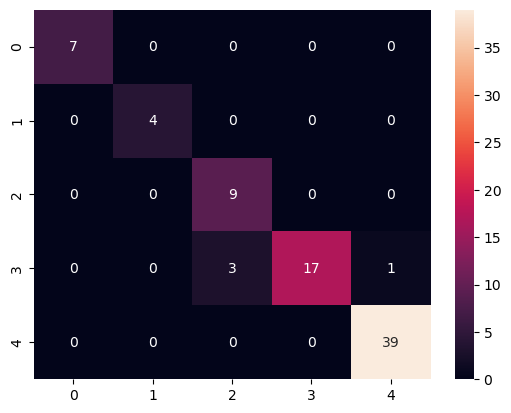

In [25]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Cross-validation**

In [26]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



## Decision Tree chizamiz

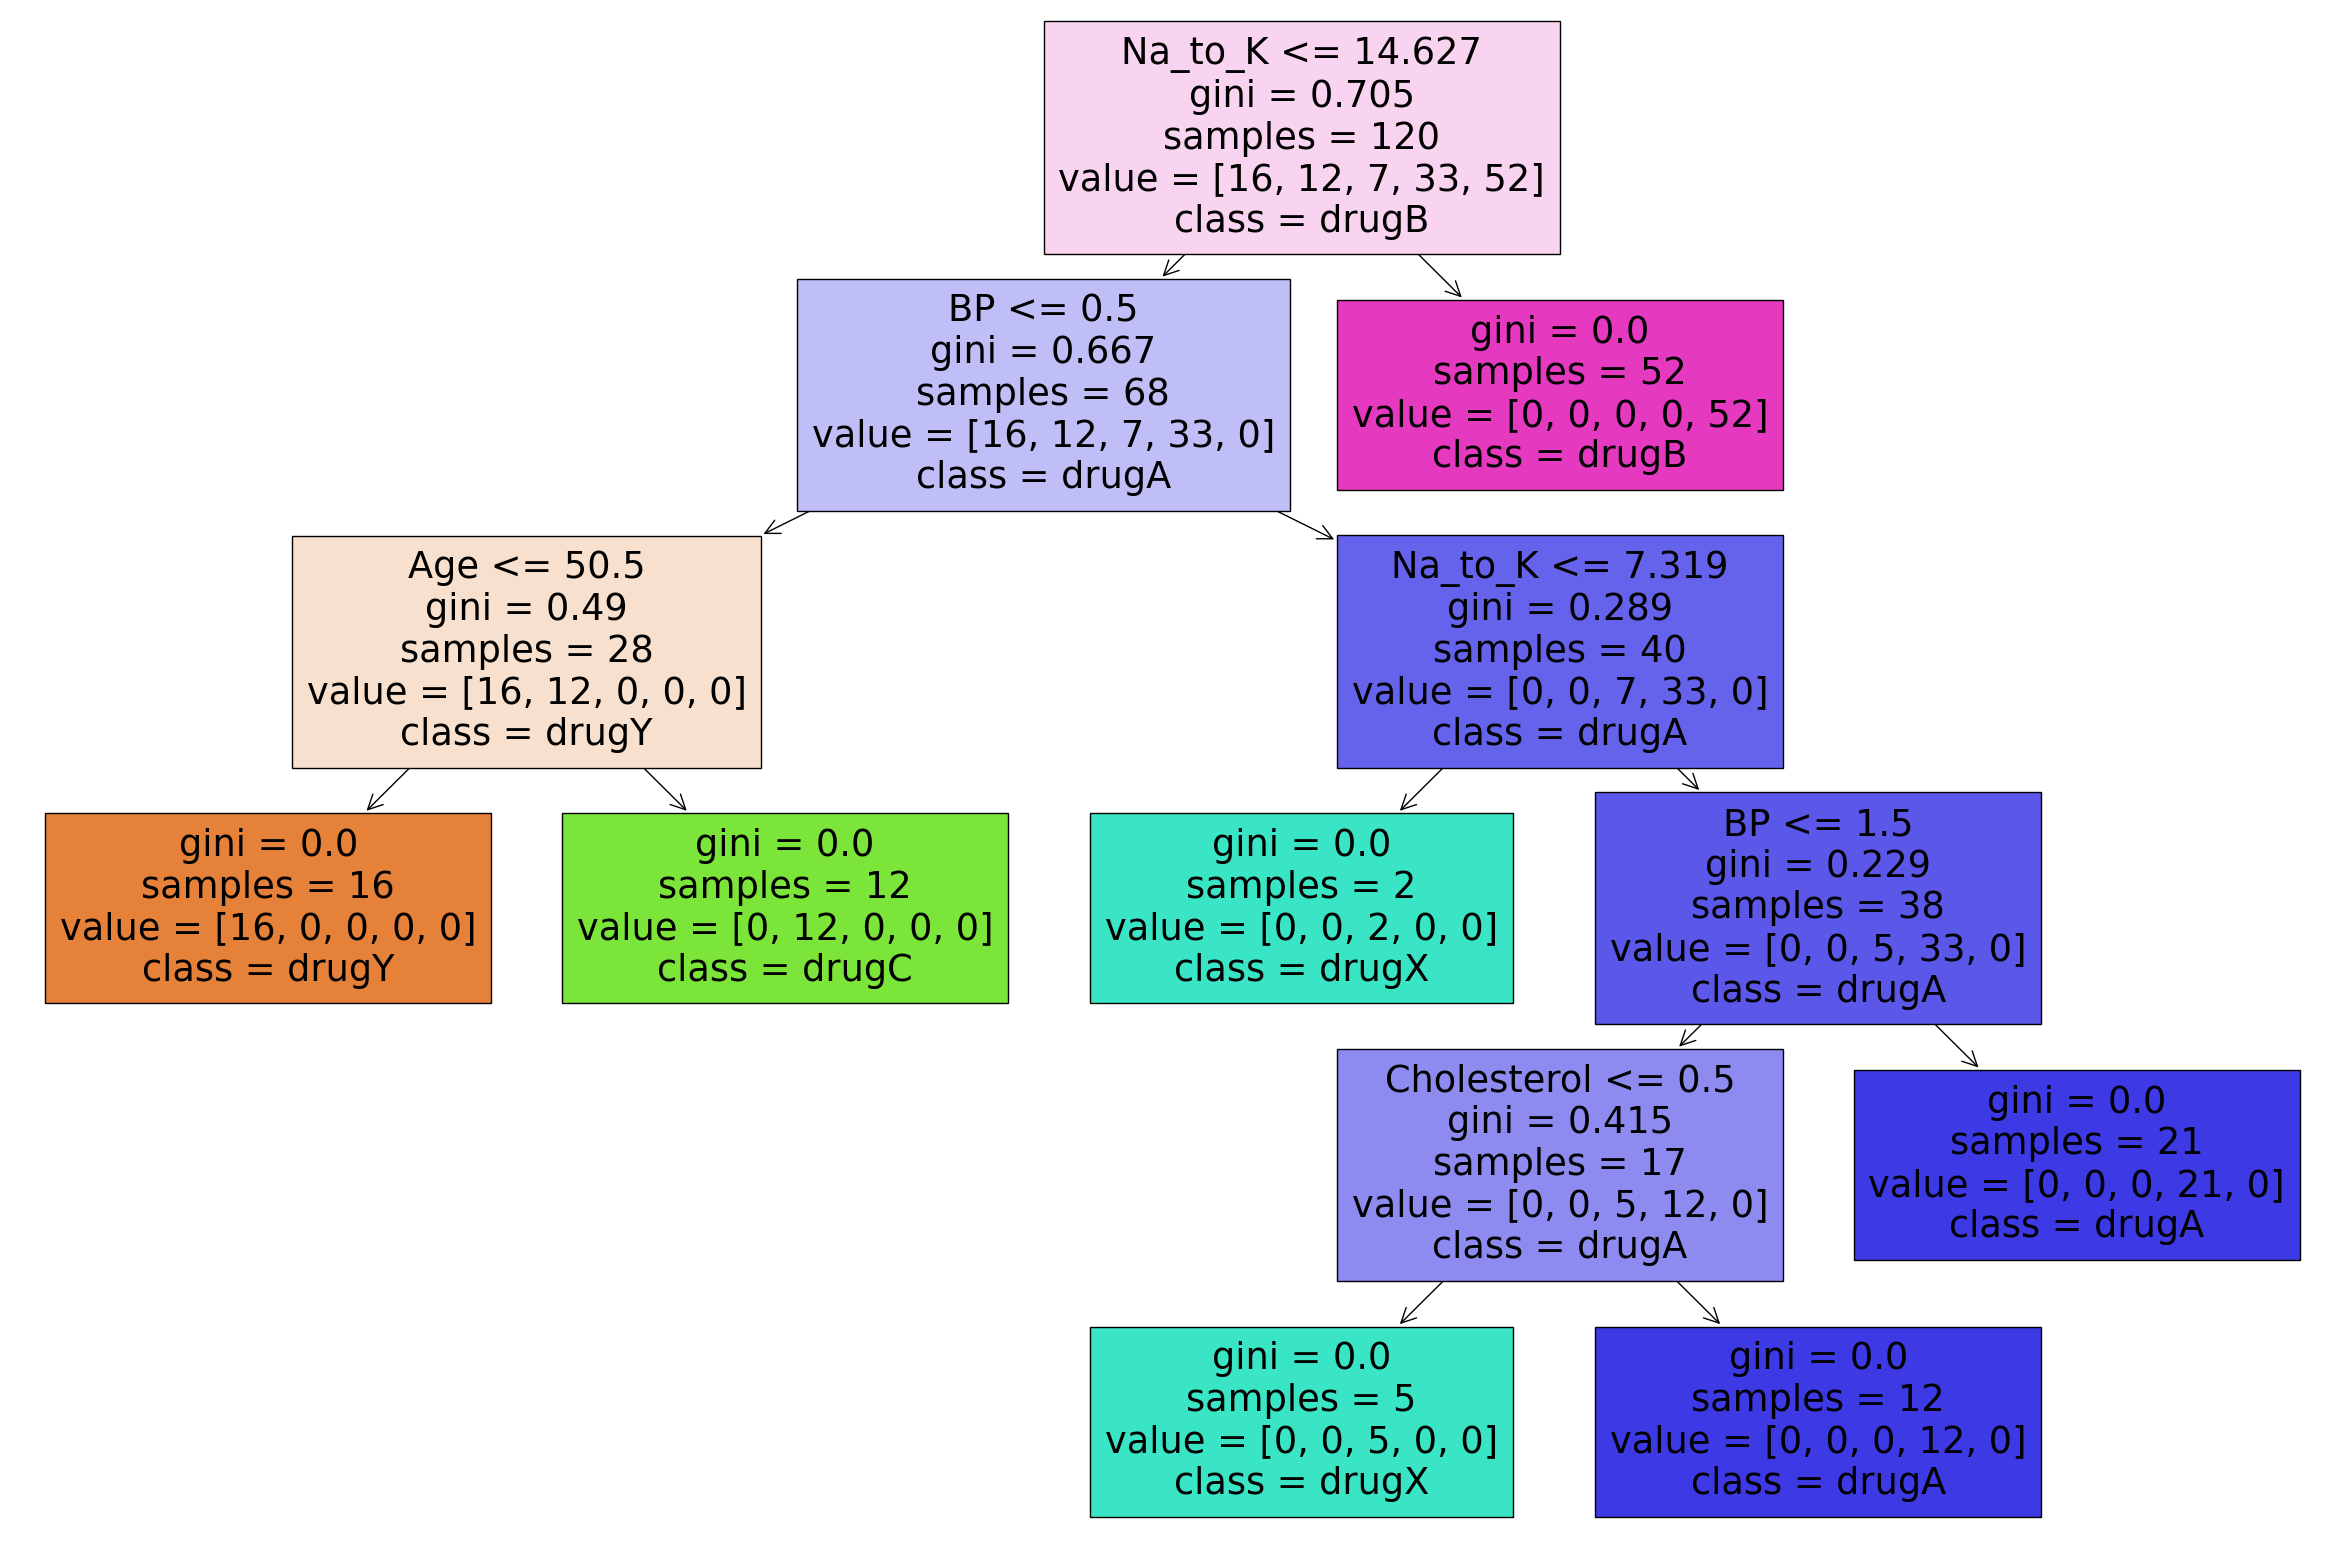

In [30]:
columns = df.drop("Drug", axis = 1).columns
classes = df["Drug"].unique()

plt.figure(figsize = (30, 20))
tree.plot_tree(tree_model, feature_names=columns, class_names=classes, filled = True)
plt.show()

# Hyperparameters

Har bir model o'ziga xos giperparametrlar bilan keladi, biz bu parametrlarni sozlash orqali model aniqligini yoki tezligini oshirishimiz mumkin. 

k-NN uchun bu `k` ya'ni qo'shnilar soni edi. Decision Treen da esa bir nechta giperparametrlar mavjud. Barcha parametrlarni ushbu link orqali ko'rishingiz mumkin: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**`min_impurity_decrease'** - natija qanchalik "toza" bo'lishini belgilaydi. Standart qiymati 0

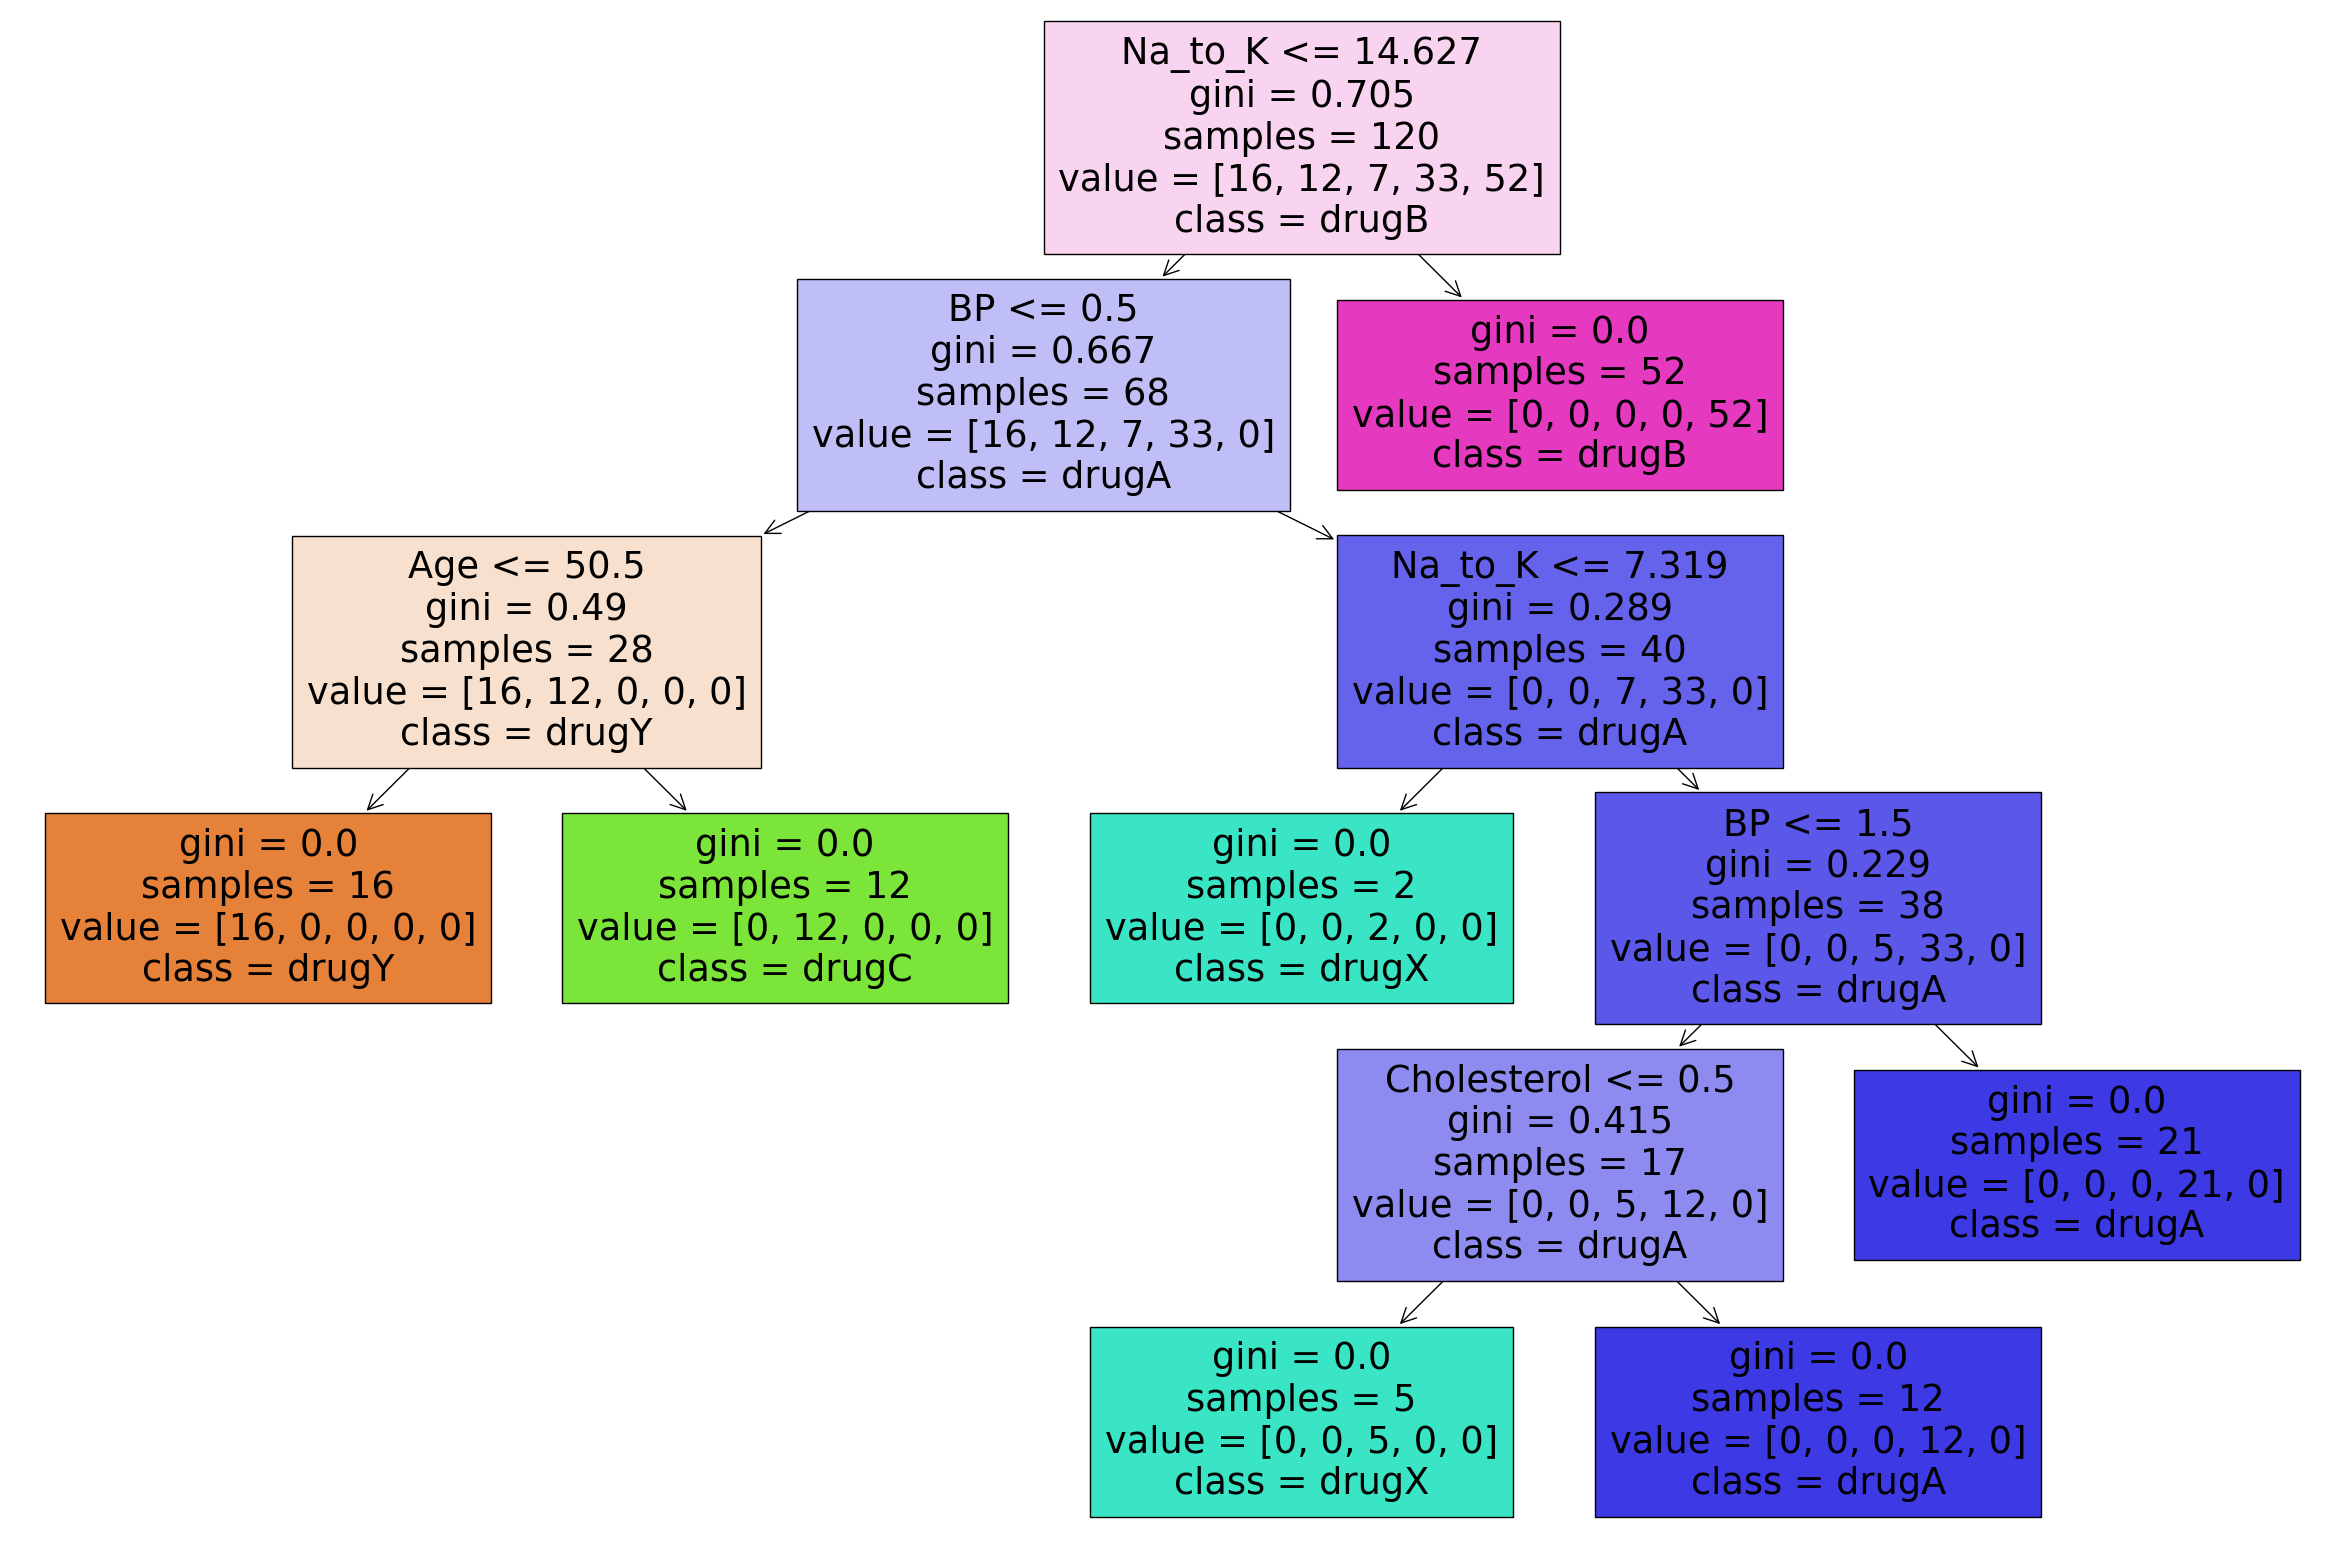

In [33]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=columns, class_names=classes, filled=True)
plt.show()

max_depth - shajara qavatlari soni

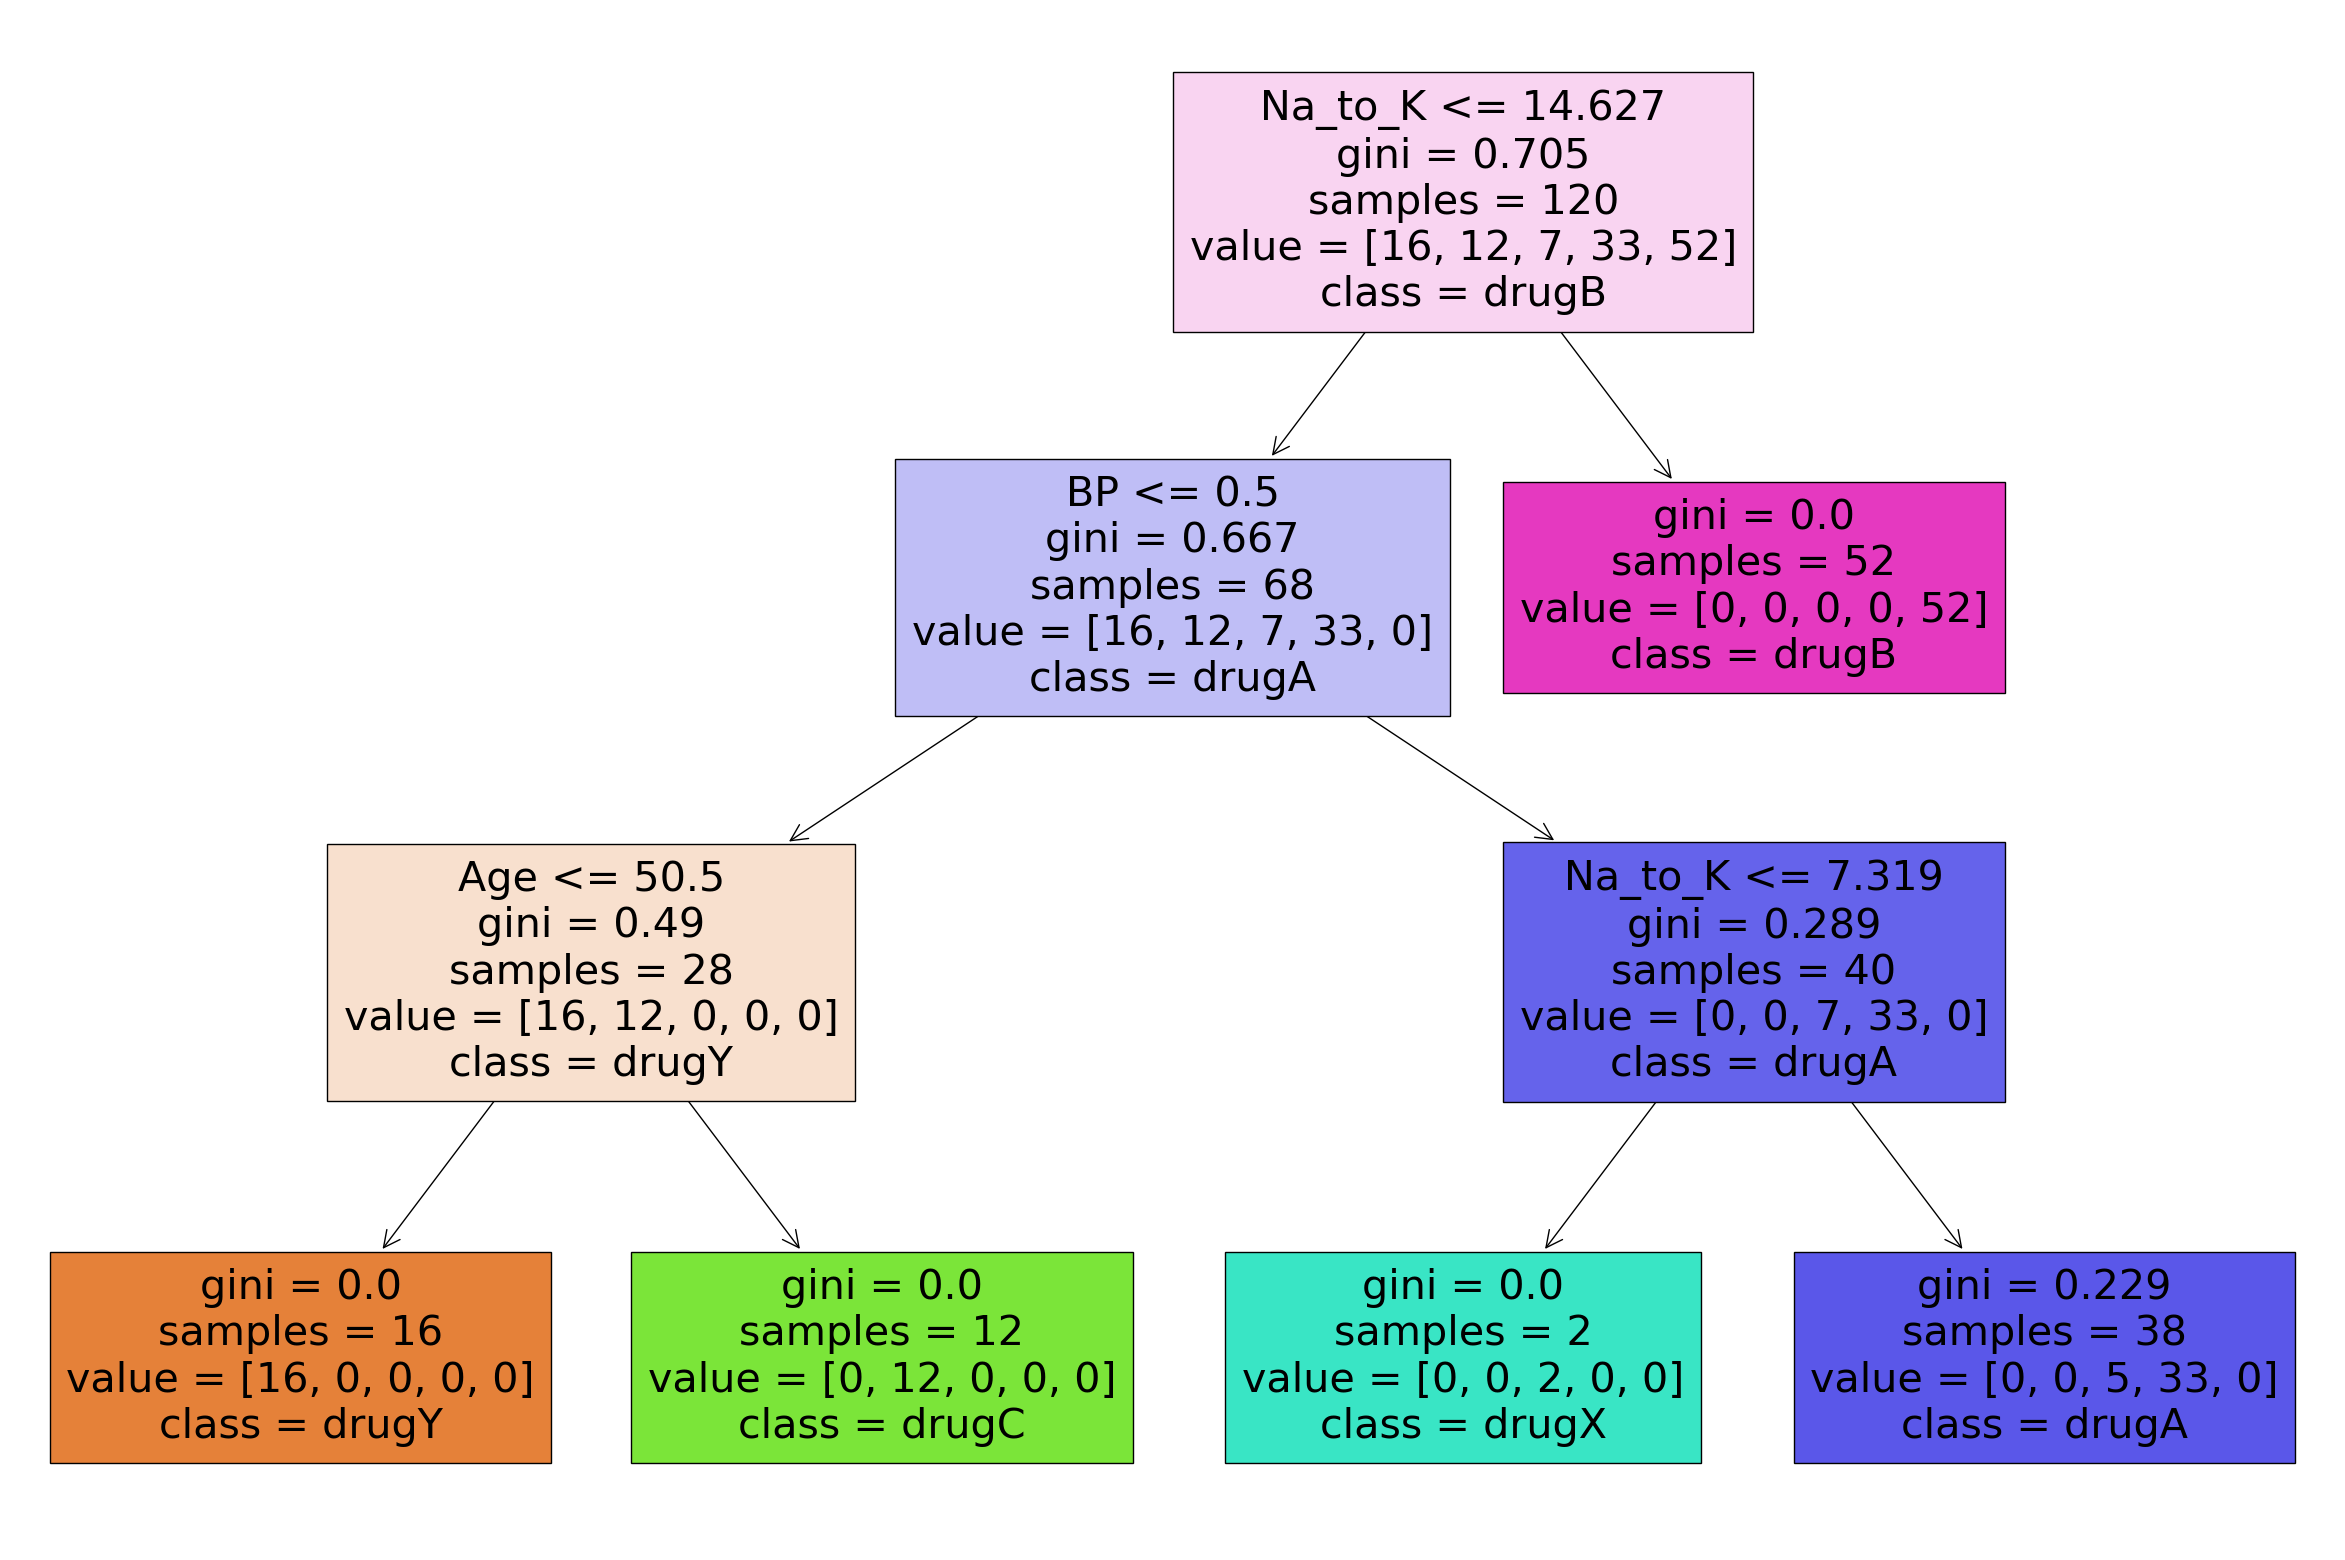

In [36]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=columns, class_names=classes, filled=True)
plt.show()

**`min_samples_leaf`** - leaf node (yakuniy, barg tugun) hosil qilish uchun eng kam elementlar soni

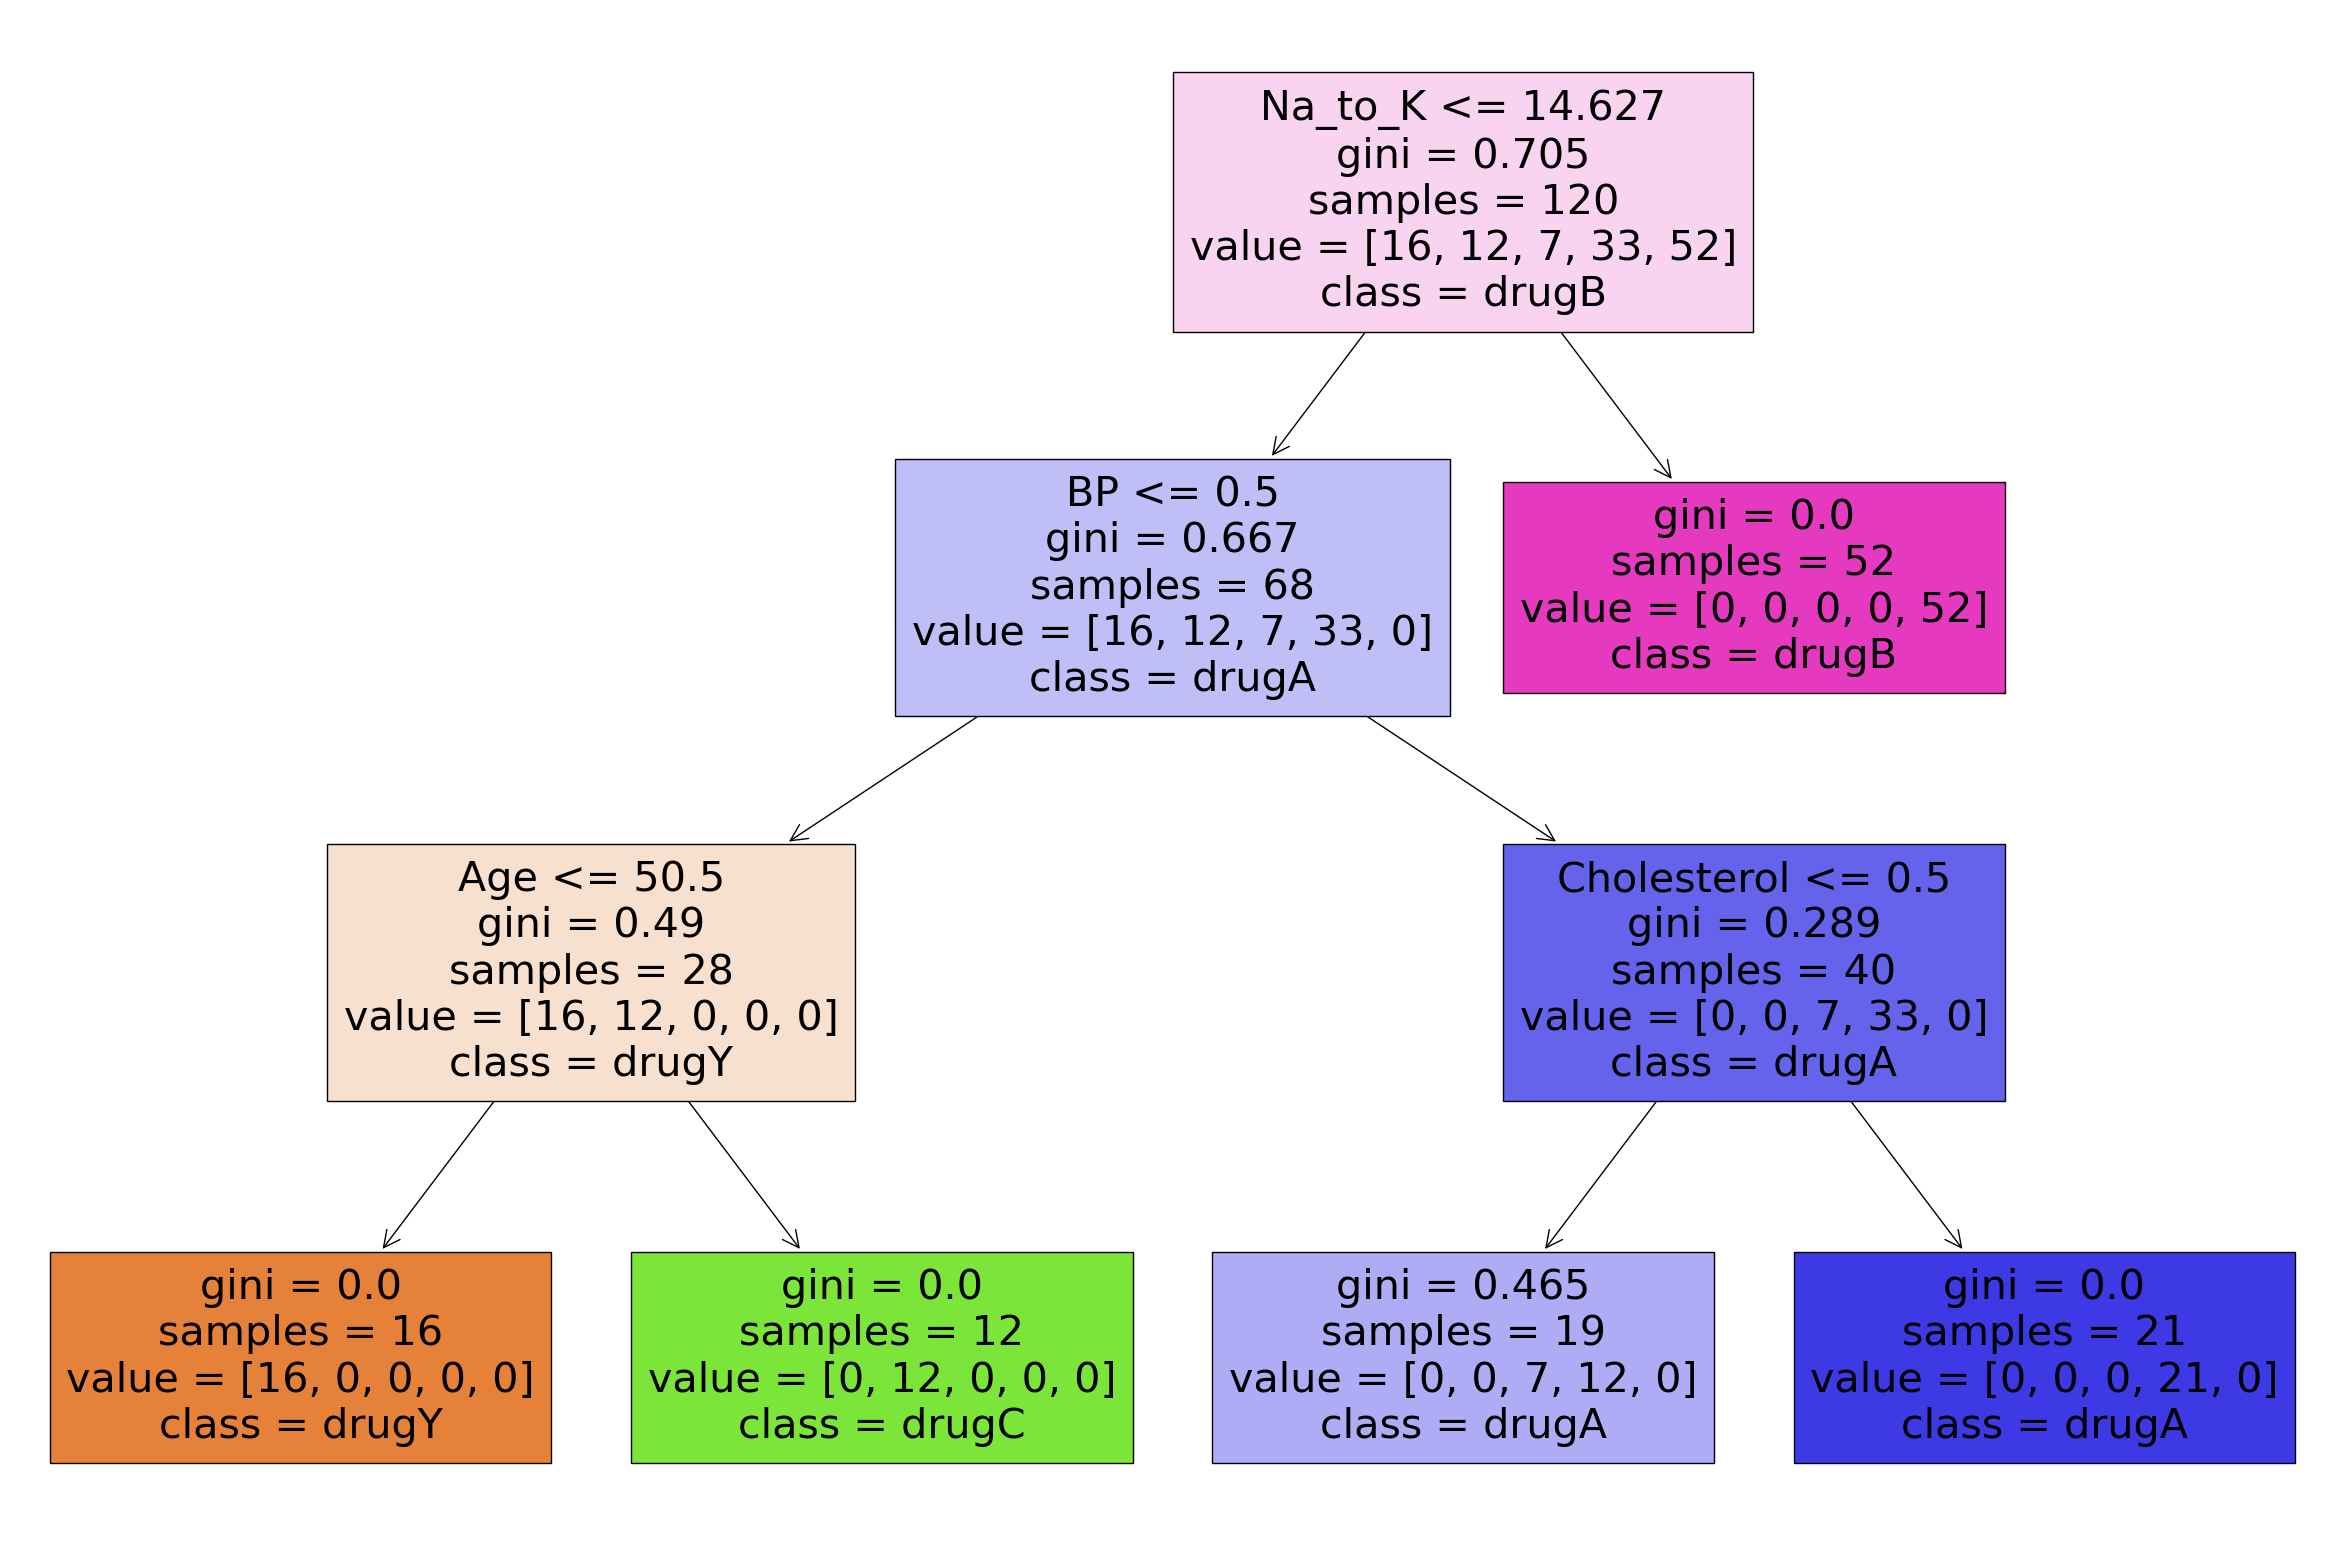

In [37]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=columns, class_names=classes, filled=True)
plt.show()

## Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - o'rmondagi daraxtlar soni.

In [38]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.78      0.88         9
       drugX       0.91      0.95      0.93        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.96        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))